In [24]:
import sys 
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.preprocessing import remove_special_characters, remove_stopwords, preprocess, load_train_test_indices
import numpy as np
import pickle
import pandas as pd    
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.model_selection import train_test_split
import math
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem.porter import PorterStemmer

In [2]:
data_path = '../data/'
df = pd.read_csv(data_path + 'final_merged_dataset.csv')

In [3]:
train, test, df = preprocess(df)
train_indices, test_indices = load_train_test_indices()
print("Example of processed data : ", train["preprocess"].head(5))

Example of processed data :  29533    coronavirus drug dexamethasone: covid-19 dexam...
22341    remember one? “if look (hydroxychloroquine) su...
5390     real sense, (oklahoma has) flattened curve. .....
22358    free horses! 52 thoroughbred horses need homes...
5612      58% coronavirus deaths scotland care facilities.
Name: preprocess, dtype: object


In [27]:
corpus = df["preprocess"].tolist()
vect =CountVectorizer(min_df=0.,max_df=1.0)
X = vect.fit_transform(corpus)
X_train = X[train_indices, :]
X_test = X[test_indices, :]
y_train = train["label"]
y_test = test["label"]

(array([13004.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15796.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

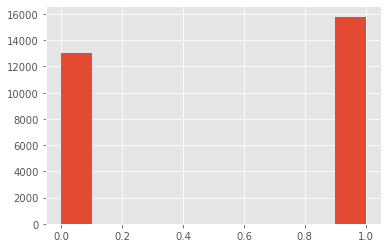

In [6]:
plt.hist(y_train)

(array([1481.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

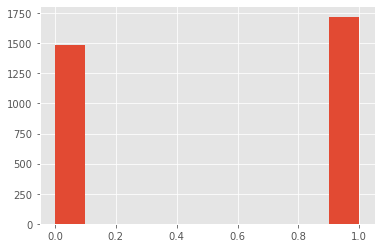

In [7]:
plt.hist(y_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
nb = GaussianNB()
lr = LogisticRegression()

In [17]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [18]:
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [23]:
n = 0
for ind, (prediction, label) in enumerate(zip(y_pred, y_test)):
  if prediction != label and n<10:
    n = n+1
    print("ORIGINAL TWEET IS : \n", test["tweet"].iloc[ind], "\n",
          "PROCESSED TWEET IS : \n", test["preprocess"].iloc[ind], "\n",
                                'has been classified as ', prediction,
                                'and should be ', label, "\n")

ORIGINAL TWEET IS : 
 I do really appreciate our Indian Government for this.. Giving a ray of hope to the Indians who are stuck in there.. But, they have to properly check their health status to confirm #Coronavirus negative..! https://t.co/Dijwh49VcJ 
 PROCESSED TWEET IS : 
 appreciate indian government this.. giving ray hope indians stuck there.. but, properly check health status confirm coronavirus negative..! 
 has been classified as  0 and should be  1 

ORIGINAL TWEET IS : 
 CDC: First in line should be healthcare and essential workers and those at high risk. https://t.co/ZBfEW70P1E #covid19 
 PROCESSED TWEET IS : 
 cdc: line healthcare essential workers high risk. covid19 
 has been classified as  0 and should be  1 

ORIGINAL TWEET IS : 
 New coronavirus stable for hours on surfaces | National Institutes of Health (NIH) #QUIROCOVID  https://t.co/R0TlDpLkkK 
 PROCESSED TWEET IS : 
 new coronavirus stable hours surfaces | national institutes health (nih) quirocovid 
 has been cla

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1481
           1       0.87      0.56      0.68      1720

    accuracy                           0.72      3201
   macro avg       0.76      0.73      0.72      3201
weighted avg       0.76      0.72      0.71      3201



In [22]:
print(confusion_matrix(y_test,y_pred))

[[1338  143]
 [ 754  966]]


In [30]:
tfidf = TfidfVectorizer()
X=tfidf.fit_transform(corpus)
X_train = X[train_indices, :]
X_test = X[test_indices, :]

In [31]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [32]:
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74      1481
           1       0.85      0.57      0.68      1720

    accuracy                           0.71      3201
   macro avg       0.74      0.73      0.71      3201
weighted avg       0.75      0.71      0.71      3201



In [34]:
print(confusion_matrix(y_test,y_pred))

[[1303  178]
 [ 739  981]]


In [35]:
n = 0
for ind, (prediction, label) in enumerate(zip(y_pred, y_test)):
  if prediction != label and n<10:
    n = n+1
    print("ORIGINAL TWEET IS : \n", test["tweet"].iloc[ind], "\n",
          "PROCESSED TWEET IS : \n", test["preprocess"].iloc[ind], "\n",
                                'has been classified as ', prediction,
                                'and should be ', label, "\n")

ORIGINAL TWEET IS : 
 I do really appreciate our Indian Government for this.. Giving a ray of hope to the Indians who are stuck in there.. But, they have to properly check their health status to confirm #Coronavirus negative..! https://t.co/Dijwh49VcJ 
 PROCESSED TWEET IS : 
 appreciate indian government this.. giving ray hope indians stuck there.. but, properly check health status confirm coronavirus negative..! 
 has been classified as  0 and should be  1 

ORIGINAL TWEET IS : 
 CDC: First in line should be healthcare and essential workers and those at high risk. https://t.co/ZBfEW70P1E #covid19 
 PROCESSED TWEET IS : 
 cdc: line healthcare essential workers high risk. covid19 
 has been classified as  0 and should be  1 

ORIGINAL TWEET IS : 
 New coronavirus stable for hours on surfaces | National Institutes of Health (NIH) #QUIROCOVID  https://t.co/R0TlDpLkkK 
 PROCESSED TWEET IS : 
 new coronavirus stable hours surfaces | national institutes health (nih) quirocovid 
 has been cla